In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier


In [2]:
df = pd.read_csv('c:/users/stjam/downloads/bank-additional-full.csv', sep=';', header=0,quotechar='"',na_values=['<NA>', 'unknown'])


In [3]:
print(df.head)

<bound method NDFrame.head of        age          job  marital            education default housing loan  \
0       56    housemaid  married             basic.4y      no      no   no   
1       57     services  married          high.school     NaN      no   no   
2       37     services  married          high.school      no     yes   no   
3       40       admin.  married             basic.6y      no      no   no   
4       56     services  married          high.school      no      no  yes   
...    ...          ...      ...                  ...     ...     ...  ...   
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

         contact month day_of_wee

In [4]:
print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
missing_values = df.isna()

# Locate rows with missing values
rows_with_missing_values = df[missing_values.any(axis=1)]

# Locate columns with missing values
columns_with_missing_values = df.columns[missing_values.any(axis=0)]

# Display the rows and columns with missing values
print("Rows with Missing Values:\n", rows_with_missing_values)
print("\nColumns with Missing Values:\n", columns_with_missing_values)

Rows with Missing Values:
        age          job  marital    education default housing loan    contact  \
1       57     services  married  high.school     NaN      no   no  telephone   
5       45     services  married     basic.9y     NaN      no   no  telephone   
7       41  blue-collar  married          NaN     NaN      no   no  telephone   
10      41  blue-collar  married          NaN     NaN      no   no  telephone   
15      54      retired  married     basic.9y     NaN     yes  yes  telephone   
...    ...          ...      ...          ...     ...     ...  ...        ...   
41118   34   technician  married          NaN      no     yes   no   cellular   
41120   60       admin.  married          NaN      no      no   no   cellular   
41122   34   technician  married          NaN      no      no   no   cellular   
41135   54   technician  married          NaN      no     yes   no   cellular   
41175   34      student   single          NaN      no     yes   no   cellular   



In [7]:
missing_values = df.isna()
rows_with_missing_values = df[missing_values.any(axis=1)]


In [8]:
print("Rows with Missing Values Before Filling:\n", rows_with_missing_values)


Rows with Missing Values Before Filling:
        age          job  marital    education default housing loan    contact  \
1       57     services  married  high.school     NaN      no   no  telephone   
5       45     services  married     basic.9y     NaN      no   no  telephone   
7       41  blue-collar  married          NaN     NaN      no   no  telephone   
10      41  blue-collar  married          NaN     NaN      no   no  telephone   
15      54      retired  married     basic.9y     NaN     yes  yes  telephone   
...    ...          ...      ...          ...     ...     ...  ...        ...   
41118   34   technician  married          NaN      no     yes   no   cellular   
41120   60       admin.  married          NaN      no      no   no   cellular   
41122   34   technician  married          NaN      no      no   no   cellular   
41135   54   technician  married          NaN      no     yes   no   cellular   
41175   34      student   single          NaN      no     yes   no 

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [10]:
missing_values_after_filling = df.isna()
rows_with_missing_values_after_filling = df[missing_values_after_filling.any(axis=1)]


In [11]:
print("Rows with Missing Values After Filling:\n", rows_with_missing_values_after_filling)


Rows with Missing Values After Filling:
 Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

[0 rows x 21 columns]


In [12]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
print("Original DataFrame:")
print(df.head())

# Check if there are any missing values after filling
print("\nDataFrame after filling missing values:")
print(df.head())

Original DataFrame:
   age        job  marital    education default housing loan    contact month  \
0   56  housemaid  married     basic.4y      no      no   no  telephone   may   
1   57   services  married  high.school      no      no   no  telephone   may   
2   37   services  married  high.school      no     yes   no  telephone   may   
3   40     admin.  married     basic.6y      no      no   no  telephone   may   
4   56   services  married  high.school      no      no  yes  telephone   may   

  day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0         mon  ...         1    999         0  nonexistent          1.1   
1         mon  ...         1    999         0  nonexistent          1.1   
2         mon  ...         1    999         0  nonexistent          1.1   
3         mon  ...         1    999         0  nonexistent          1.1   
4         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3

### Count for each variables shows the frequency distribution of unique values in the dataset

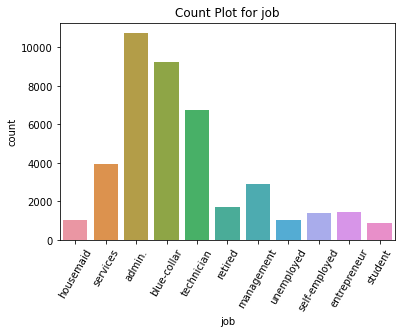

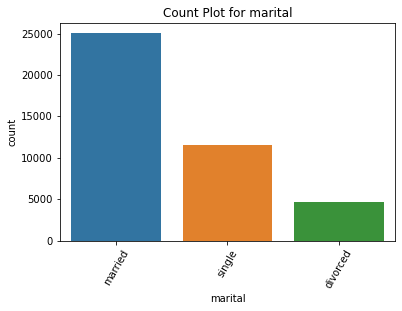

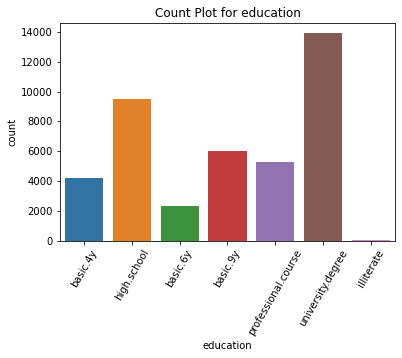

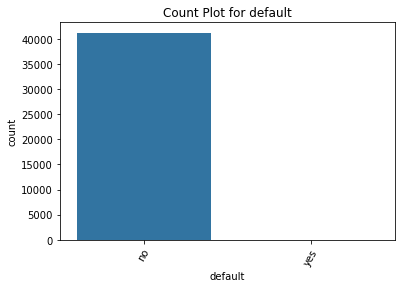

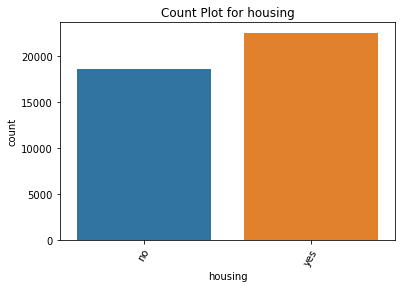

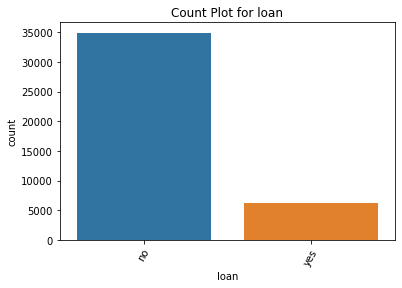

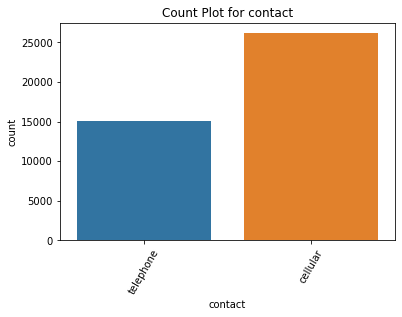

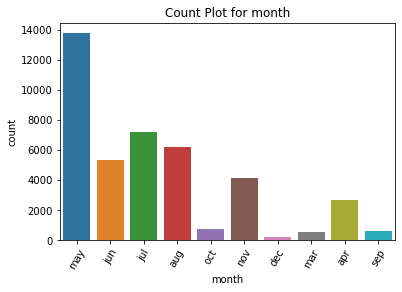

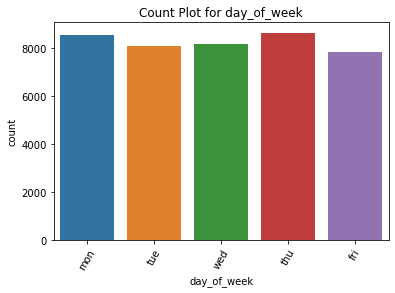

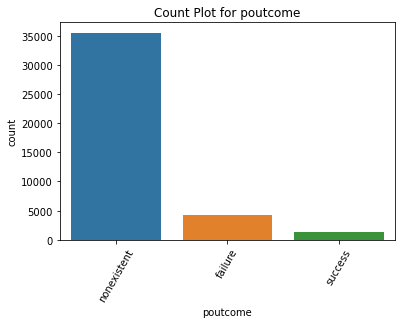

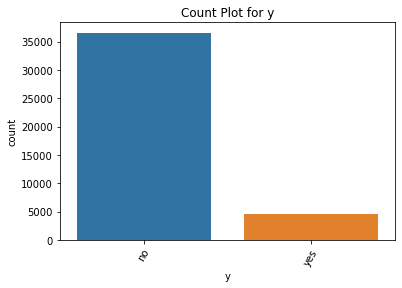

In [13]:
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is non-numeric
        sns.countplot(x=df[column])
        plt.title(f'Count Plot for {column}')
        plt.xticks(rotation=60)  # Adjust the rotation angle as needed
        plt.show()

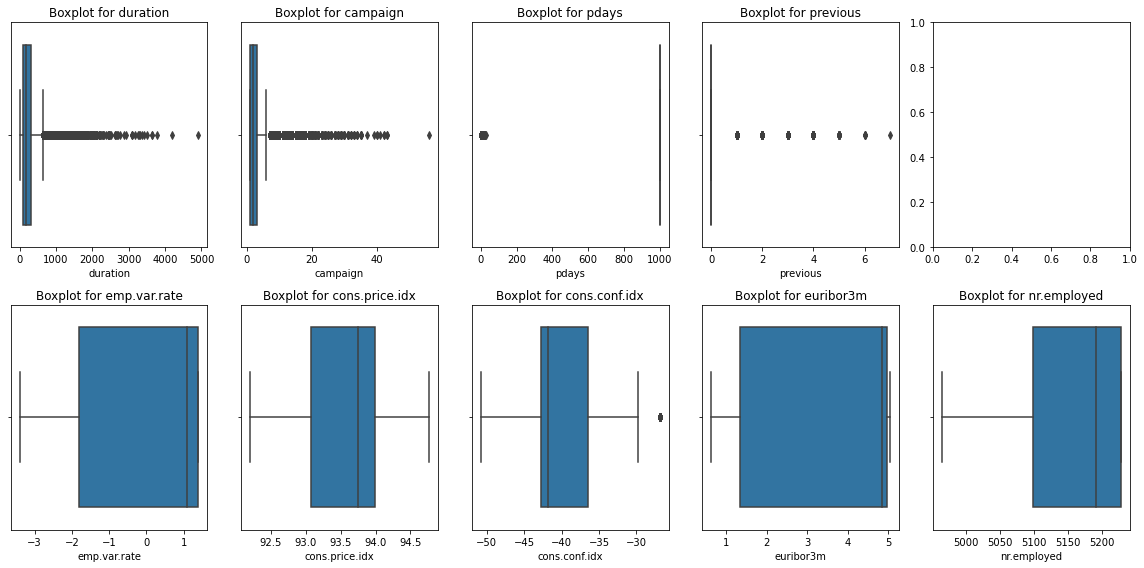

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt



# Specify the integer and float columns
int_columns = ['duration','campaign', 'pdays', 'previous']
float_columns = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 8))

# Plot boxplots for integer columns
for i, column in enumerate(int_columns):
    if df[column].dtype in ['int64', 'float64']:
        sns.boxplot(x=df[column], ax=axes[0, i])
        axes[0, i].set_title(f'Boxplot for {column}')

# Plot boxplots for float columns
for i, column in enumerate(float_columns):
    if df[column].dtype in ['int64', 'float64']:
        sns.boxplot(x=df[column], ax=axes[1, i])
        axes[1, i].set_title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()


### Measuring skewness indicates the symmetry of that distribution


In [15]:
from scipy.stats import skew


numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numeric_columns:
    skewness = skew(df[column])
    print(f"Skewness for '{column}': {skewness}")
    
 
    if skewness > 0:
        print("Positive skewness: The distribution is skewed to the right (tail on the right).")
    elif skewness < 0:
        print("Negative skewness: The distribution is skewed to the left (tail on the left).")
    else:
        print("Zero skewness: The distribution is perfectly symmetrical.")


Skewness for 'age': 0.7846682380932289
Positive skewness: The distribution is skewed to the right (tail on the right).
Skewness for 'duration': 3.2630224157610432
Positive skewness: The distribution is skewed to the right (tail on the right).
Skewness for 'campaign': 4.762333252560971
Positive skewness: The distribution is skewed to the right (tail on the right).
Skewness for 'pdays': -4.922010656450045
Negative skewness: The distribution is skewed to the left (tail on the left).
Skewness for 'previous': 3.8319026847007014
Positive skewness: The distribution is skewed to the right (tail on the right).
Skewness for 'emp.var.rate': -0.7240691785977529
Negative skewness: The distribution is skewed to the left (tail on the left).
Skewness for 'cons.price.idx': -0.23087924271991117
Negative skewness: The distribution is skewed to the left (tail on the left).
Skewness for 'cons.conf.idx': 0.3031688173189229
Positive skewness: The distribution is skewed to the right (tail on the right).
Skewn

In [16]:
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate Rows except first occurrence:")
print(duplicate_rows)

Duplicate Rows except first occurrence:
       age          job   marital            education default housing loan  \
1266    39  blue-collar   married             basic.6y      no      no   no   
5664    56  blue-collar   married             basic.4y      no      no   no   
12261   36      retired   married    university.degree      no      no   no   
14234   27   technician    single  professional.course      no      no   no   
16956   47   technician  divorced          high.school      no     yes   no   
18465   32   technician    single  professional.course      no     yes   no   
19608   33       admin.   married    university.degree      no     yes   no   
20216   55     services   married          high.school      no      no   no   
20534   41   technician   married  professional.course      no     yes   no   
25217   39       admin.   married    university.degree      no      no   no   
28477   24     services    single          high.school      no     yes   no   
32516   35  

In [17]:
duplicates_with_original = df[df.duplicated(keep=False)]

# Get the indices of the original rows
original_indices = df[~df.duplicated(keep=False)].index

# Display the original indices along with the duplicated rows
print("Original Indices for Duplicated Rows:")
print(original_indices)
print("\nDuplicated Rows:")
print(duplicates_with_original)
# Keep the first occurrence of duplicates
df_first_occurrence = df.drop_duplicates(keep='first')

# Display the DataFrame with only the first occurrence of duplicates
print("DataFrame with First Occurrence of Duplicates:")
print(df_first_occurrence)


Original Indices for Duplicated Rows:
Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            41178, 41179, 41180, 41181, 41182, 41183, 41184, 41185, 41186,
            41187],
           dtype='int64', length=41160)

Duplicated Rows:
       age          job   marital            education default housing loan  \
236     56  blue-collar   married             basic.4y      no      no   no   
1265    39  blue-collar   married             basic.6y      no      no   no   
1266    39  blue-collar   married             basic.6y      no      no   no   
5664    56  blue-collar   married             basic.4y      no      no   no   
12260   36      retired   married    university.degree      no      no   no   
12261   36      retired   married    university.degree      no      no   no   
14155   27   technician    single  professional.course      no      no   no   
14234   27   technician    single  professional.course      no     

In [18]:
df['housing'] = df['housing'].replace({'yes': 1, 'no': 0})

# Display the resulting DataFrame
print(df['housing'])
df['loan'] = df['loan'].replace({'yes': 1, 'no': 0})

# Display the resulting DataFrame
print(df['loan'])


0        0
1        0
2        1
3        0
4        0
        ..
41183    1
41184    0
41185    1
41186    0
41187    1
Name: housing, Length: 41188, dtype: int64
0        0
1        0
2        0
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: loan, Length: 41188, dtype: int64


In [19]:
# Remobving Duplicates
df= df.drop_duplicates()

In [20]:
print(df.isna().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [21]:
# Method 1: Replacing unknown with mode(most frequent) value 
# By Aysha Abdul Azeez
columns_nan = ['job', 'marital', 'education', 'default', 'housing', 'loan']      # columns containing NaN
impute = SimpleImputer(strategy='most_frequent')                                 # Impute with mode


In [22]:
df_mode_imputed = df.copy()
for col in columns_nan:
    df_mode_imputed[col] = impute.fit_transform(df_mode_imputed[[col]])

In [23]:
print(f'NA count before Imputation:\n{df[columns_nan].isna().sum()}')
print(f'\nNA count after mode Imputation:\n{df_mode_imputed[columns_nan].isna().sum()}')

NA count before Imputation:
job          0
marital      0
education    0
default      0
housing      0
loan         0
dtype: int64

NA count after mode Imputation:
job          0
marital      0
education    0
default      0
housing      0
loan         0
dtype: int64


In [24]:
df_mode_imputed

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,1,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,1,0,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Review for Method 1 by Nrusimha Saraswati Sai Teja Jampani

The approach was made rather simpler by good use of sklearn library instead of complicating 
 things by finding mode for each column. I can see that the the NAs are replaced by most frequest value
 appearing in the column. This method can introduce some bias but has to be verified during testing

In [25]:
# Method 2: Imputing unknown with Random sample values
# By Purvesh Mehta
df_random_imputed = df.copy()


In [26]:
for col in columns_nan:
    col_unique_values = df_random_imputed[col].dropna().unique()
    df_random_imputed[col] = df_random_imputed[col].apply(lambda x: np.random.choice(col_unique_values) if pd.isnull(x) else x)

In [27]:
print(f'NA count before Imputation:\n{df[columns_nan].isna().sum()}')
print(f'\nNA count after Random Imputation:\n{df_random_imputed[columns_nan].isna().sum()}')

NA count before Imputation:
job          0
marital      0
education    0
default      0
housing      0
loan         0
dtype: int64

NA count after Random Imputation:
job          0
marital      0
education    0
default      0
housing      0
loan         0
dtype: int64


In [28]:
df_random_imputed

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,1,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,1,0,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Review for Method 2 by Aysha Abdul Azeez

 I understand that since only categorical columns contain NA values, it would be wise enough to do a random 
 sampling of the values and replace the NAs with random values instead of other methods like imputing with mean 
 or median. There can be inconsistency in the prediction since the values imputed can be too random for the model
 to produce optimal results

In [29]:
# Method 3: Model based imputing using KNN
# By Nrusimha Saraswati Sai Teja Jampani
df_model_imputed = df.copy()
cat_cols = list(df.select_dtypes(include=['object']).columns)
print(cat_cols)

['job', 'marital', 'education', 'default', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [30]:
label_encoder = LabelEncoder()

for col in cat_cols:
    df_model_imputed[col] = label_encoder.fit_transform(df_model_imputed[col].astype(str))
    
for col in columns_nan:
    
    df_train = df_model_imputed.dropna(subset=[col])     # Create a DataFrame with non-missing values for training the model
    
    X_train = df_train.drop(col, axis=1)                 # Separate features and target variable
    y_train = df_train[col]                              # Take all other columns as features and current NA valued column as target
    
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)     # Create a random forest classifier
    
    rf_classifier.fit(X_train, y_train)                 # Fit the model
    
    missing_rows = df_model_imputed[df_model_imputed[col].isna()]      # Identify rows with missing values in the target column
    
    # Predict missing values
    if not missing_rows.empty:
        X_missing = missing_rows.drop(col, axis=1)
        predicted_values = rf_classifier.predict(X_missing)
        
        df_model_imputed.loc[missing_rows.index, column] = predicted_values  # Fill in missing values


In [31]:
print(f'NA count before Imputation:\n{df[columns_nan].isna().sum()}')
print(f'\nNA count after Model based Imputation:\n{df_model_imputed[columns_nan].isna().sum()}')

NA count before Imputation:
job          0
marital      0
education    0
default      0
housing      0
loan         0
dtype: int64

NA count after Model based Imputation:
job          0
marital      0
education    0
default      0
housing      0
loan         0
dtype: int64


 Review for Method 3 by Purvesh Mehta

Appriciate the use of all other columns for predicting the NA values. But some of the columns may have
weak relationship with the target column and may just add computational complexity. Randomforest can be a good option,
however, other exploring other models too might give good results

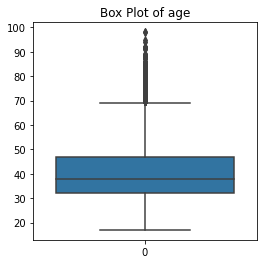

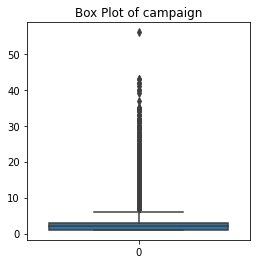

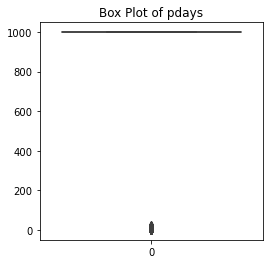

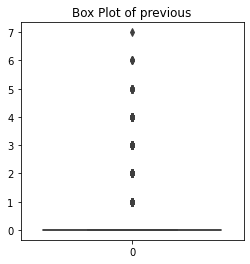

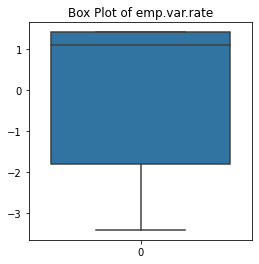

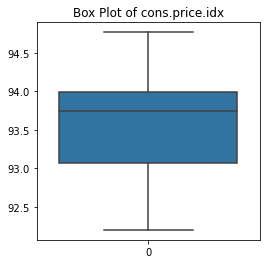

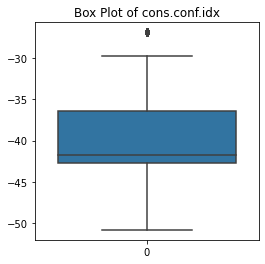

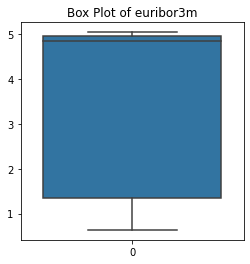

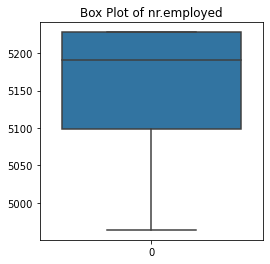

In [32]:
# Handling Outliers
# Box plots to visualize outliers
numeric_variables = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for col in numeric_variables:
    plt.figure(figsize=(4, 4))
    sns.boxplot(data=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [33]:
# Age, campaign and cons.conf.idx contains outliers

In [34]:
# Method 1: Trimming the outlier values
# By Purvesh Mehta

In [35]:
outlier_cols = ['age', 'campaign','cons.conf.idx']
df_trimmed = df.copy()
for col in outlier_cols:
    q1 = df_trimmed[col].quantile(0.25)
    q3 = df_trimmed[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_trimmed[col] = df_trimmed[col].clip(lower=lower_bound, upper=upper_bound)

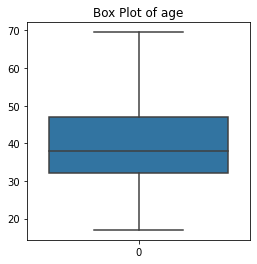

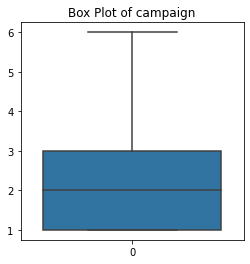

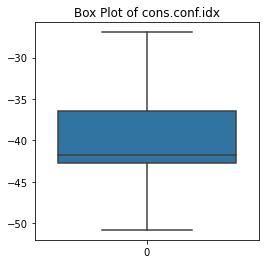

In [36]:
for col in outlier_cols:
    plt.figure(figsize=(4, 4))
    sns.boxplot(data=df_trimmed[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


Method1 review by Aysha Abdul Azeez

Trimming seem to be very strict on the outliers. All the outliers determined by the boxplot
 are now trimmed to upper or lower quartile. Functioning is implemented well enough

In [37]:
# Method 2: Log Transformation
# By Nrusimha Saraswati Sai Teja Jampani

In [38]:
df_log_transformed = df.copy()
df_log_transformed['cons.conf.idx']= df_log_transformed['cons.conf.idx'] + abs(df['cons.conf.idx'].min()) + 1 # Make negative values positive

In [39]:
df_log_transformed[outlier_cols] = np.log1p(df_log_transformed[outlier_cols]) # apply log transformation

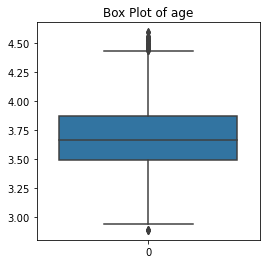

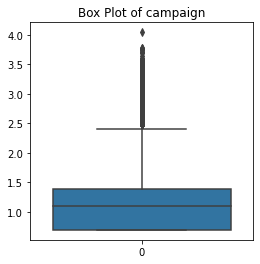

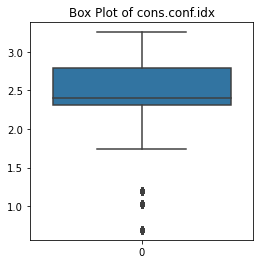

In [40]:
for col in outlier_cols:
    plt.figure(figsize=(4, 4))
    sns.boxplot(data=df_log_transformed[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

 Method 2 Review by Purvesh Mehta
 
 Log transformation is not eliminating all the outliers but instead eliminating the skewness in the data
 and narrowing down the data distribution. Since it cannot handle negative values, any negative values are converted to
 positive

In [41]:
# Method 3: Box Cox transformation

In [42]:
df_boxcox_transformed = df.copy()

In [43]:
df_boxcox_transformed['cons.conf.idx']= df_boxcox_transformed['cons.conf.idx'] + abs(df['cons.conf.idx'].min()) + 1   #Make negative values positive
for col in outlier_cols:
    df_boxcox_transformed[col], _ = boxcox(df_boxcox_transformed[col] + 1)  # Adding constant 1 to handle zero and negative values

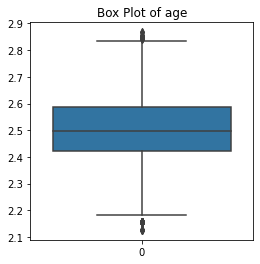

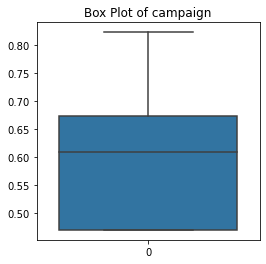

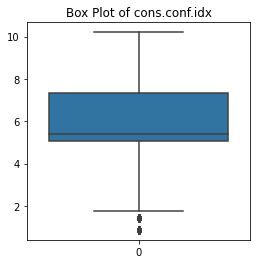

In [44]:
for col in outlier_cols:
    plt.figure(figsize=(4, 4))
    sns.boxplot(data=df_boxcox_transformed[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

Method 3 review by Nrusimha Saraswati Sai Teja Jampani

Boxcox transformation too is trying to reduce the skewness in the data but in a more symmetric way compared 
 to the log transformation. The results and outliers are handled in a more better way

# EDA

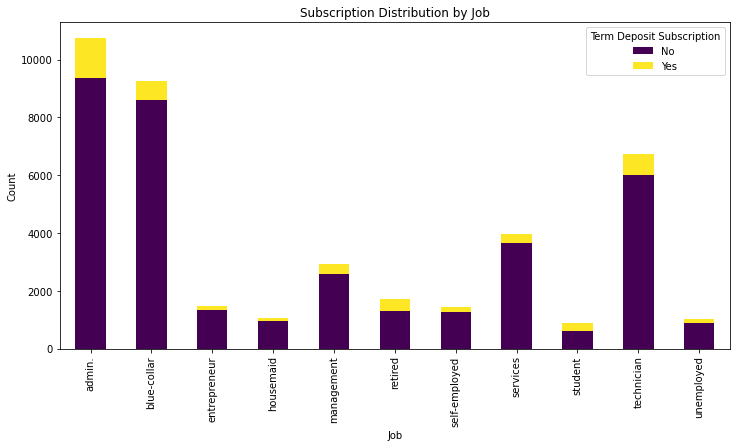

In [45]:
job_subscription_counts = df.groupby(['job', 'y']).size().unstack()

# Plot the bar chart
job_subscription_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Subscription Distribution by Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.legend(title='Term Deposit Subscription', labels=['No', 'Yes'])
plt.show()

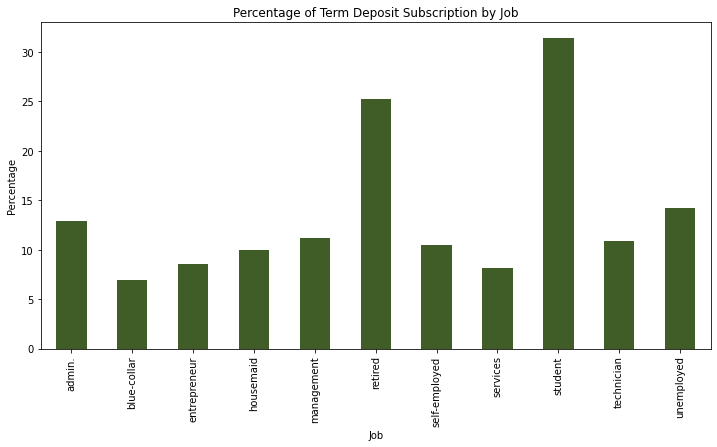

y             job  total_count   yes
0          admin.        10748  1388
1     blue-collar         9252   638
2    entrepreneur         1456   124
3       housemaid         1060   106
4      management         2924   328
5         retired         1718   434
6   self-employed         1421   149
7        services         3967   323
8         student          875   275
9      technician         6739   730
10     unemployed         1014   144


In [46]:
job_subscription_counts = df.groupby(['job', 'y']).size().unstack()

# Calculate the percentage of subscriptions for each job category
job_subscription_percentage = (job_subscription_counts['yes'] / job_subscription_counts.sum(axis=1)) * 100

# Plot the bar chart for percentage subscriptions
job_subscription_percentage.plot(kind='bar', color='#405d27', figsize=(12, 6))
plt.title('Percentage of Term Deposit Subscription by Job')
plt.xlabel('Job')
plt.ylabel('Percentage')
plt.show()

#calculate the count of 'no' and 'yes'
job_category_counts = df.groupby('job')['y'].value_counts().unstack(fill_value=0).reset_index()

# Calculate total_count 
job_category_counts['total_count'] = job_category_counts['no'] + job_category_counts['yes']

# Display the resulting table
print(job_category_counts[['job', 'total_count', 'yes']])


Based on the analysis, the hypothesis results suggest that the primary subscribers to term deposits are students, with retired individuals following closely. Administrative and unemployed individuals also show a notable likelihood of subscribing. In contrast, blue-collar workers, entrepreneurs, and those in the services sector are observed to be less inclined to subscribe to term deposits, representing the least likely categories within the dataset.

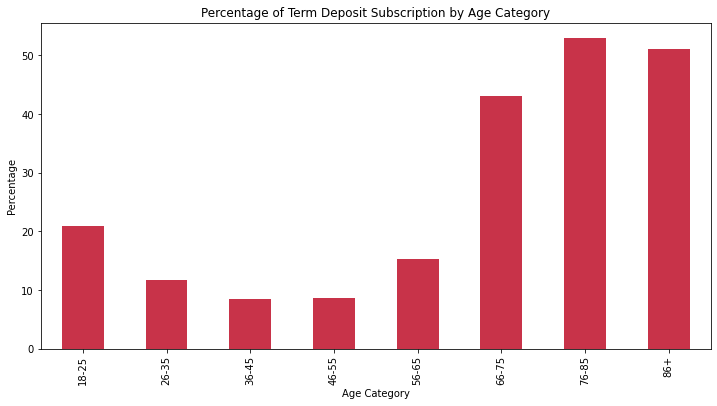

  age_category  total_count   yes
0        18-25         1660   347
1        26-35        14843  1740
2        36-45        12839  1092
3        46-55         8247   717
4        56-65         2962   451
5        66-75          373   161
6        76-85          202   107
7          86+           43    22


In [47]:
age_bins = [18, 25, 35, 45, 55, 65, 75, 85, 100]

# Create age categories using pd.cut
df['age_category'] = pd.cut(df['age'], bins=age_bins, labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86+'], include_lowest=True)

# Create a DataFrame with counts of subscriptions for each age category
age_subscription_counts = df.groupby(['age_category', 'y']).size().unstack()

# Calculate the percentage of subscriptions for each age category
age_subscription_percentage = (age_subscription_counts['yes'] / age_subscription_counts.sum(axis=1)) * 100

# Plot the bar chart for percentage subscriptions by age category
age_subscription_percentage.plot(kind='bar', color='#c83349', figsize=(12, 6))
plt.title('Percentage of Term Deposit Subscription by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Percentage')
plt.show()

age_category_counts = df.groupby(['age_category', 'y']).size().unstack().reset_index()
age_category_counts.columns = ['age_category', 'no', 'yes']

# Fill NaN values with 0 for 'no' and 'yes' columns
age_category_counts[['no', 'yes']] = age_category_counts[['no', 'yes']].fillna(0)

# Calculate total_count and add a new column
age_category_counts['total_count'] = age_category_counts['no'] + age_category_counts['yes']

# Display the resulting table
print(age_category_counts[['age_category', 'total_count', 'yes']])

The results shows majority of the term depsoit subscribers belongs to the age group of 76-85,followed by 86+

In [48]:
age_group_df = df[df['age_category'] == '76-85']

# Group by 'job' 
#calculate the count of each job
job_counts = age_group_df.groupby('job').size().reset_index(name='count')

#job with the highest count
majority_job = job_counts.loc[job_counts['count'].idxmax()]

# Display the majority job
print(f"The majority job in the age group 76-85 is: {majority_job['job']} with count {majority_job['count']}")


The majority job in the age group 76-85 is: retired with count 175


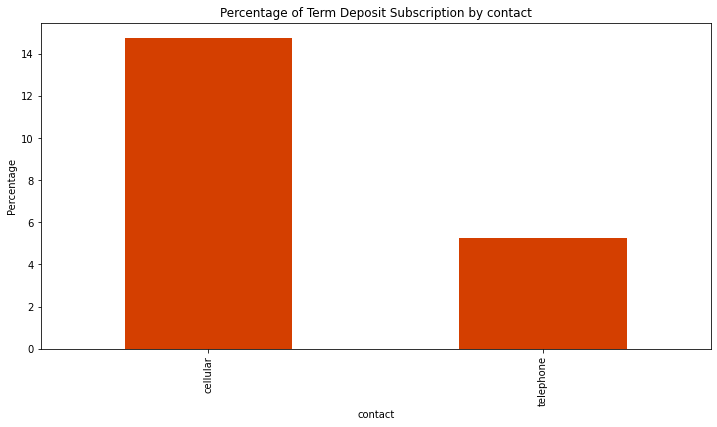

In [49]:

contact_subscription_counts = df.groupby(['contact', 'y']).size().unstack()

# Calculate the percentage of subscriptions for each age category
contact_subscription_percentage = (contact_subscription_counts['yes'] / contact_subscription_counts.sum(axis=1)) * 100

# Plot the bar chart for percentage subscriptions by age category
contact_subscription_percentage.plot(kind='bar', color='#d43f00', figsize=(12, 6))
plt.title('Percentage of Term Deposit Subscription by contact')
plt.xlabel('contact')
plt.ylabel('Percentage')
plt.show() 





The highest subscription rate was observed when customers were contacted through cellular communication.

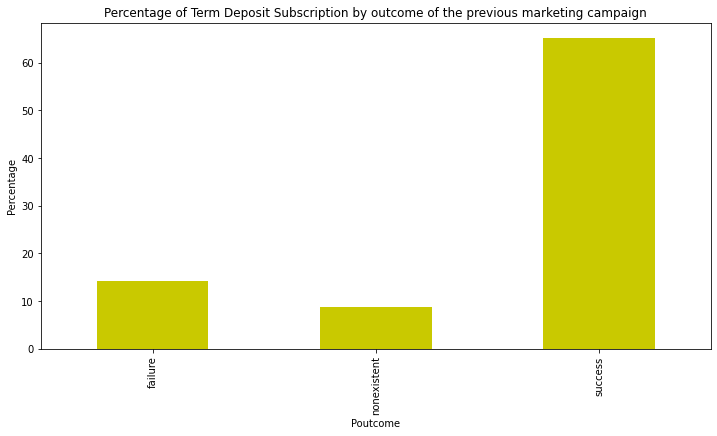

In [50]:
poutcome_subscription_counts = df.groupby(['poutcome', 'y']).size().unstack()

# Calculate the percentage of subscriptions for each age category
poutcome_subscription_percentage = (poutcome_subscription_counts['yes'] / poutcome_subscription_counts.sum(axis=1)) * 100

# Plot the bar chart for percentage subscriptions by age category
poutcome_subscription_percentage.plot(kind='bar', color='#c9c900', figsize=(12, 6))
plt.title('Percentage of Term Deposit Subscription by outcome of the previous marketing campaign')
plt.xlabel('Poutcome')
plt.ylabel('Percentage')
plt.show()

A greater number of customers subscribed to the term deposit when the outcome of the previous marketing campaign was successful.

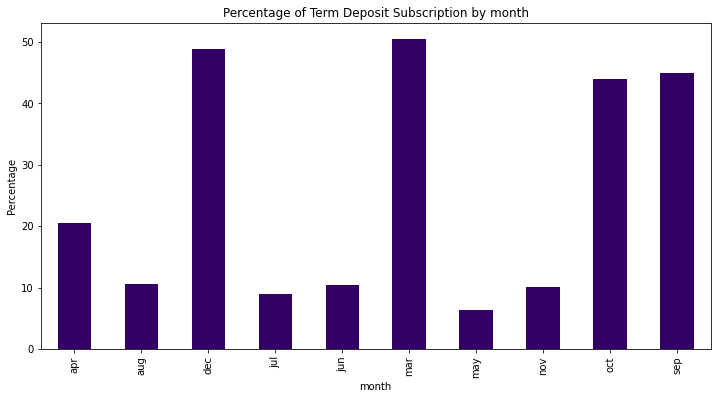

y month  total_count  yes
0   apr         2631  539
1   aug         6175  655
2   dec          182   89
3   jul         7169  648
4   jun         5318  559
5   mar          546  276
6   may        13766  886
7   nov         4100  416
8   oct          717  315
9   sep          570  256


In [51]:

month_subscription_counts = df.groupby(['month', 'y']).size().unstack()

# Calculate the percentage of subscriptions for each age category
month_subscription_percentage = (month_subscription_counts['yes'] / month_subscription_counts.sum(axis=1)) * 100

# Plot the bar chart for percentage subscriptions by age category
month_subscription_percentage.plot(kind='bar', color='#330066', figsize=(12, 6))
plt.title('Percentage of Term Deposit Subscription by month')
plt.xlabel('month')
plt.ylabel('Percentage')
plt.show() 




# Group by 'month' 
#calculate the count of 'no' and 'yes'
month_category_counts = df.groupby('month')['y'].value_counts().unstack(fill_value=0).reset_index()

# Calculate total_count 
month_category_counts['total_count'] = month_category_counts['no'] + month_category_counts['yes']

# Display the resulting table
print(month_category_counts[['month', 'total_count', 'yes']])


The analysis of the count by month reveals that March had the highest number of subscriptions, with 276 individuals subscribing to the term deposit product out of a total of 546 customers contacted in that month. This indicates a relatively high success rate for the telemarketing campaign during March. The findings suggest that targeting customers in March may be particularly effective in terms of encouraging them to subscribe to the term deposit, making it a potentially favorable period for marketing efforts.

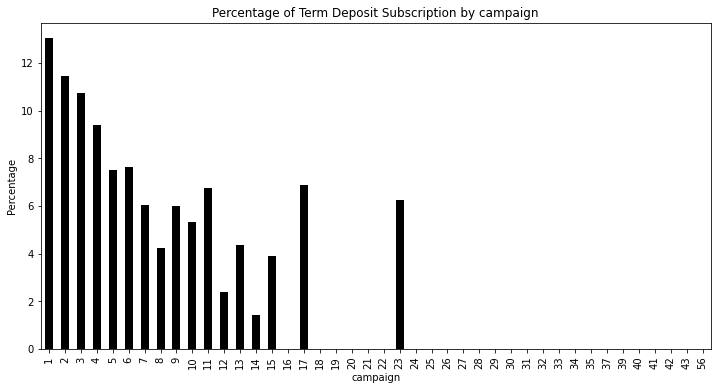

y   campaign  total_count   yes
0          1        17632  2299
1          2        10568  1211
2          3         5340   574
3          4         2650   249
4          5         1599   120
5          6          979    75
6          7          629    38
7          8          400    17
8          9          283    17
9         10          225    12
10        11          177    12
11        12          125     3
12        13           92     4
13        14           69     1
14        15           51     2
15        16           51     0
16        17           58     4
17        18           33     0
18        19           26     0
19        20           30     0
20        21           24     0
21        22           17     0
22        23           16     1
23        24           15     0
24        25            8     0
25        26            8     0
26        27           11     0
27        28            8     0
28        29           10     0
29        30            7     0
30      

In [52]:

campaign_subscription_counts = df.groupby(['campaign', 'y']).size().unstack()

# Calculate the percentage of subscriptions for each age category
campaign_subscription_percentage = (campaign_subscription_counts['yes'] / campaign_subscription_counts.sum(axis=1)) * 100

# Plot the bar chart for percentage subscriptions by age category
campaign_subscription_percentage.plot(kind='bar', color='#000000', figsize=(12, 6))
plt.title('Percentage of Term Deposit Subscription by campaign')
plt.xlabel('campaign')
plt.ylabel('Percentage')
plt.show() 

campaign_category_counts = df.groupby('campaign')['y'].value_counts().unstack(fill_value=0).reset_index()

# Calculate total_count 
campaign_category_counts['total_count'] = campaign_category_counts['no'] + campaign_category_counts['yes']

# Display the resulting table
print(campaign_category_counts[['campaign', 'total_count', 'yes']])




This analysis provides a breakdown of the subscription counts based on the number of times customers were contacted during the marketing campaign (represented by the 'campaign' column). The table displays the total count of customers contacted for each campaign count ('campaign'), along with the number of customers who subscribed ('yes').

For example, for the first row where 'campaign' is 1, a total of 17,632 customers were contacted, and out of those, 2,299 subscribed to the term deposit. Similarly, the table shows this information for different campaign counts.



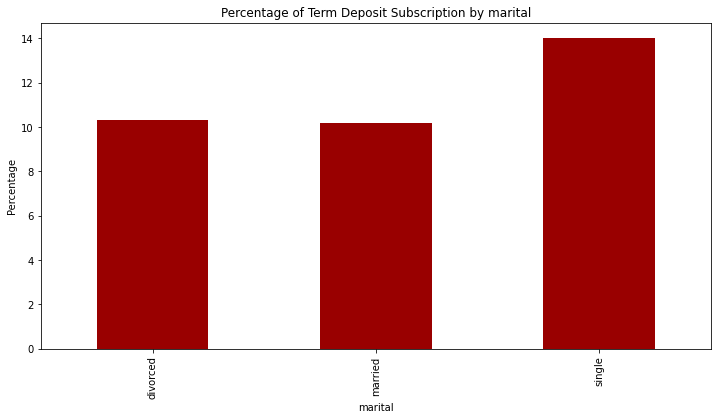

y   marital  total_count   yes
0  divorced         4611   476
1   married        24999  2543
2    single        11564  1620


In [53]:
marital_subscription_counts = df.groupby(['marital', 'y']).size().unstack()

# Calculate the percentage of subscriptions for each age category
marital_subscription_percentage = (marital_subscription_counts['yes'] / marital_subscription_counts.sum(axis=1)) * 100

# Plot the bar chart for percentage subscriptions by age category
marital_subscription_percentage.plot(kind='bar', color='#990000', figsize=(12, 6))
plt.title('Percentage of Term Deposit Subscription by marital')
plt.xlabel('marital')
plt.ylabel('Percentage')
plt.show() 

marital_category_counts = df.groupby('marital')['y'].value_counts().unstack(fill_value=0).reset_index()

# Calculate total_count 
marital_category_counts['total_count'] = marital_category_counts['no'] + marital_category_counts['yes']

# Display the resulting table
print(marital_category_counts[['marital', 'total_count', 'yes']])




The analysis of marital status in the dataset indicates that the majority of customers who subscribed to the term deposit are married individuals. Out of a total of 24,999 married customers, 2,543 subscribed. Additionally, there were 1,620 subscriptions from single individuals out of a total of 11,564, and 476 subscriptions from divorced individuals out of a total of 4,611. These results provide insights into the distribution of subscriptions across different marital statuses, with married individuals having the highest number of subscriptions.

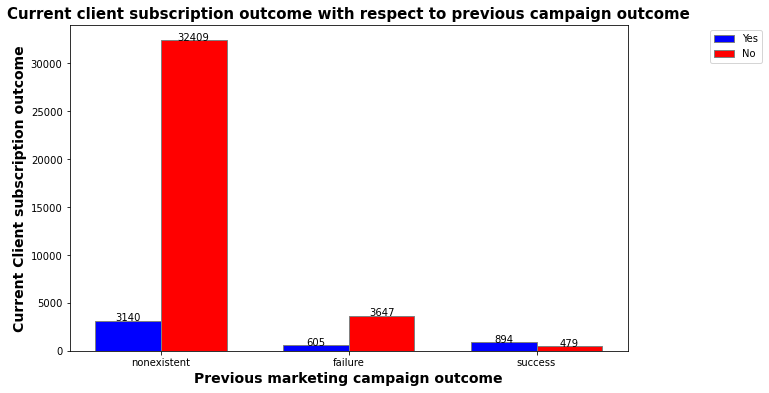

In [54]:
x = df['poutcome'].unique()
yes = []
no = []
for i in x:
    yes.append(df[(df['poutcome'] == i) & (df['y'] == 'yes')].count()[0])
    no.append(df[(df['poutcome'] == i) & (df['y'] == 'no')].count()[0])
outcomes = ['Yes', 'No']
values = [yes, no]
plt.figure(figsize=(10, 6))
bar_width = 0.35
r1 = np.arange(len(x))
r2 = [i + bar_width for i in r1]
ax1=plt.bar(r1, values[0], color='blue', width=bar_width, edgecolor='grey', label='Yes')
plt.bar(r2, values[1], color='red', width=bar_width, edgecolor='grey', label='No')
for i, v in enumerate(no):
    plt.text(i+0.35, v+1, str(round(v,4)), ha='center', color='black', fontsize=10)
for i, v in enumerate(yes):
    plt.text(i, v, str(round(v,4)), ha='center', color='black')
plt.xlabel('Previous marketing campaign outcome', fontweight='bold', fontsize = 14)
plt.ylabel('Current Client subscription outcome', fontweight='bold', fontsize = 14)
plt.xticks([r + bar_width/2 for r in range(len(x))], x)
plt.title('Current client subscription outcome with respect to previous campaign outcome',fontsize = 15, fontweight='bold' )
plt.legend(bbox_to_anchor=(1.25, 1))
plt.show()


In our analysis on the column poutcome, we have observed that many of the clients who have obliged to the previous campaign seem to have subscribed to current plan as well. Most of the customer who were not part of the previous campaign did not subscribe to the term desposit. Customers who have a failed outcome despite a campaign previously seem to stick to their principles and many did not subscribe to the term desposit on this campaign as well

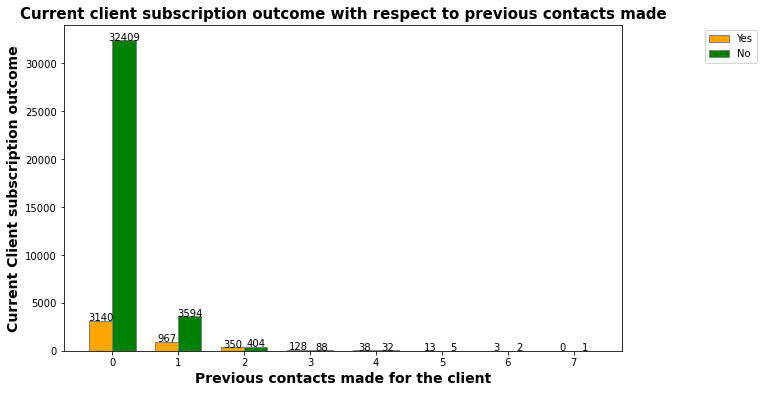

In [55]:
x = df['previous'].unique()
yes = []
no = []
for i in x:
    yes.append(df[(df['previous'] == i) & (df['y'] == 'yes')].count()[0])
    no.append(df[(df['previous'] == i) & (df['y'] == 'no')].count()[0])
outcomes = ['Yes', 'No']
values = [yes, no]
plt.figure(figsize=(10, 6))
bar_width = 0.35
r1 = np.arange(len(x))
r2 = [i + bar_width for i in r1]
ax1=plt.bar(r1, values[0], color='orange', width=bar_width, edgecolor='grey', label='Yes')
plt.bar(r2, values[1], color='green', width=bar_width, edgecolor='grey', label='No')
for i, v in enumerate(no):
    plt.text(i+0.35, v+1, str(round(v,4)), ha='center', color='black', fontsize=10)
for i, v in enumerate(yes):
    plt.text(i, v, str(round(v,4)), ha='center', color='black')
plt.xlabel('Previous contacts made for the client', fontweight='bold', fontsize = 14)
plt.ylabel('Current Client subscription outcome', fontweight='bold', fontsize = 14)
plt.xticks([r + bar_width/2 for r in range(len(x))], x)
plt.title('Current client subscription outcome with respect to previous contacts made',fontsize = 15, fontweight='bold' )
plt.legend(bbox_to_anchor=(1.25, 1))
plt.show()


It is clear from the chart that 0 to 7 contacts were made to the client previously. Most of the clients were never contacted previously and most of those clients did not subscribe to the plan even now. 1 previous contact did not help greatly either. 2 contacts made previously started to make a differnece where nearly half of them subscribed to term deposit now. Similar is the case with 3 contacts made in which more than half of them made the subscription now. 4 or more calls made previously are a lot lower in number, but still half of the clients subscribed to the current plan

In [56]:
outer = df.groupby('education').count().reset_index()


In [57]:
inner = df.groupby(['education', 'y']).count().reset_index()


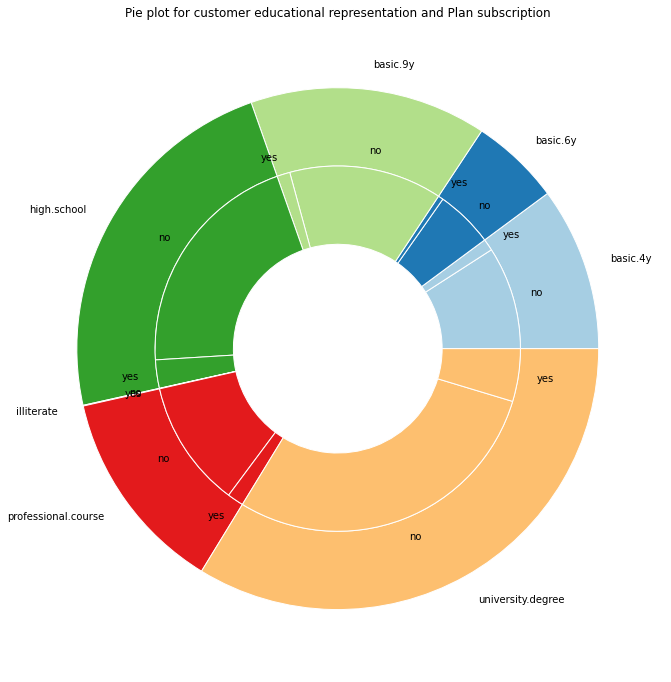

In [58]:
fig, ax = plt.subplots(figsize=(24,12))
colors = plt.cm.Paired(range(len(outer)))
inner_colors = [color for color in colors for _ in range(2)]
ax.pie(outer['age'].values.flatten(), radius=1,
       labels=outer['education'],
       colors = colors,
       wedgeprops=dict(width=0.3, edgecolor='w'))

ax.pie(inner['age'].values.flatten(), radius=1-0.3, 
       labels = inner['y'],
       colors = inner_colors,
       wedgeprops=dict(width=0.3, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.title('Pie plot for customer educational representation and Plan subscription')
plt.show()

In our analysis, we observe that there are 7 categories of educational qualification accomplished by the customers. It includes Univeristy degree, Professional course, basic 4 year, basic 9 year, high school and illeterate. Out of this there are more people with a univerity degree. Intrestingly most this people are not subscribing to the plan. Most of the High school qualified clients to are not subscribing to the plan. This tren can be seen among all the classes including professional degree and basic qualified customers. Overall, the pattern suggests that only 1/5 of the customers are suscribing to the plan irrespective of the educational qualification.

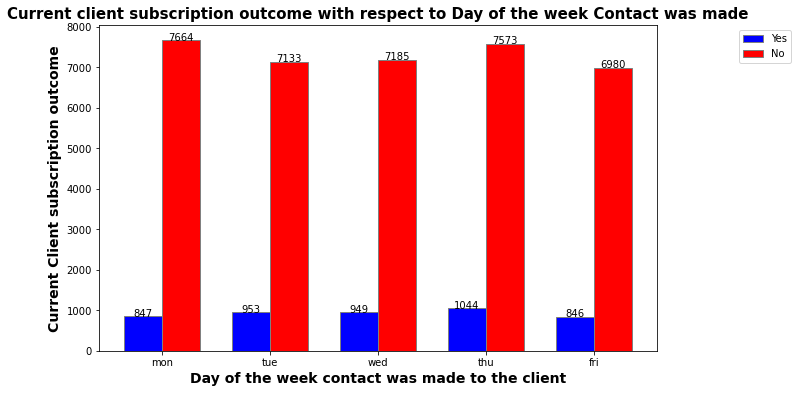

In [59]:
x = df['day_of_week'].unique()
yes = []
no = []
for i in x:
    yes.append(df[(df['day_of_week'] == i) & (df['y'] == 'yes')].count()[0])
    no.append(df[(df['day_of_week'] == i) & (df['y'] == 'no')].count()[0])
outcomes = ['Yes', 'No']
values = [yes, no]
plt.figure(figsize=(10, 6))
bar_width = 0.35
r1 = np.arange(len(x))
r2 = [i + bar_width for i in r1]
ax1=plt.bar(r1, values[0], color='blue', width=bar_width, edgecolor='grey', label='Yes')
plt.bar(r2, values[1], color='red', width=bar_width, edgecolor='grey', label='No')
for i, v in enumerate(no):
    plt.text(i+0.35, v+1, str(round(v,4)), ha='center', color='black', fontsize=10)
for i, v in enumerate(yes):
    plt.text(i, v, str(round(v,4)), ha='center', color='black')
plt.xlabel('Day of the week contact was made to the client', fontweight='bold', fontsize = 14)
plt.ylabel('Current Client subscription outcome', fontweight='bold', fontsize = 14)
plt.xticks([r + bar_width/2 for r in range(len(x))], x)
plt.title('Current client subscription outcome with respect to Day of the week Contact was made',fontsize = 15, fontweight='bold' )
plt.legend(bbox_to_anchor=(1.25, 1))
plt.show()


There clearly seem to a very little effect of the day when the contact was made to the client in determining if the customer would subscribe to the deposit plan. Intrestingly tuesday, wednesday and thursday have a little better chance of customer suscribing than monday and friday. It could be that customers are little busy on mondays and more relaxed on fridays to consider for a term deposit subscription. However, the variations are marginal.

[Text(0.5, 1.0, 'Previous concats to Duration of last contact')]

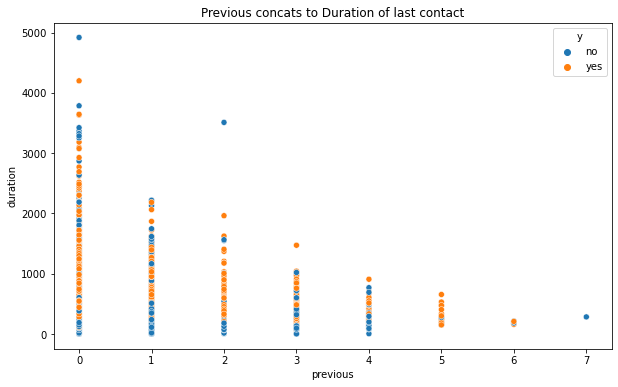

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="previous", y='duration', hue = 'y').set(title = 'Previous concats to Duration of last contact')

It is clearly visible from the above plot that with more previous contacts made to the customer, the duration of the call is getting reduced to a large extent. Clients with no previous calls are extending the call duration to until 4000 seconds and most of the customers lot falls in this place. However, customers with more previous calls are subscribing to the plan a lot better even though the number is less.

In [61]:
df_mode_imputed['loan'] = df['loan'].replace({1: 'Yes',  0: 'No'})
outer = df_mode_imputed.groupby('loan').count().reset_index()                    # Considering mode imputed loan column
inner = df_mode_imputed.groupby(['loan', 'y']).count().reset_index()

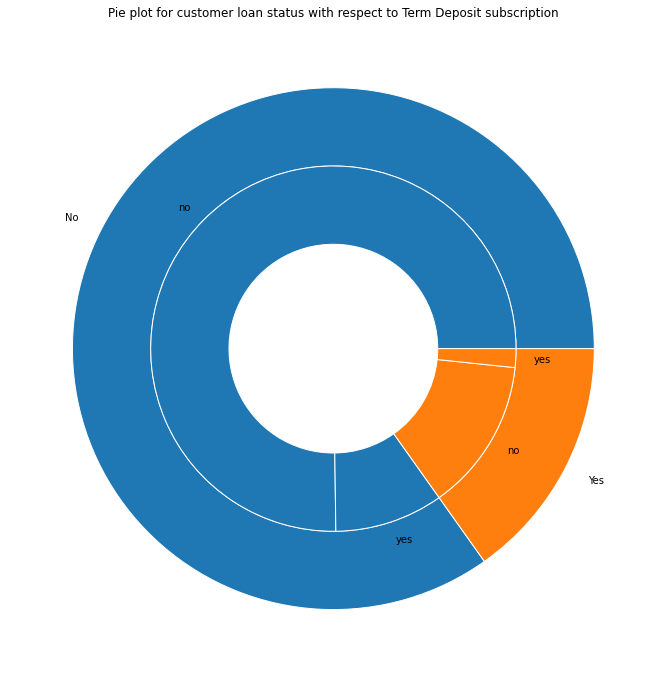

In [62]:
fig, ax = plt.subplots(figsize=(24,12))
colors = plt.cm.Paired(range(len(outer)))
colors = plt.cm.tab10(np.arange(len(outer)))
inner_colors = [color for color in colors for _ in range(2)]
ax.pie(outer['age'].values.flatten(), radius=1,
       labels=outer['loan'],
       colors = colors,
       wedgeprops=dict(width=0.3, edgecolor='w'))

ax.pie(inner['age'].values.flatten(), radius=1-0.3, 
       labels = inner['y'],
       colors = inner_colors,
       wedgeprops=dict(width=0.3, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.title('Pie plot for customer loan status with respect to Term Deposit subscription')
plt.show()

After mode imputation of unknown values, we see that most of the customers does not have a loan under their name. It can be seen in the above figure where outer pie chart represents the loan status and inner pie chart shows the corresponding plan subscription outcome. Loan status, however is not making any difference because, most of the customer without loan too have not subscribed to the plan. A few lot customers having a loan subscribed to the plan. In a larger view, the ratio between customers who subscribed and customers who did not suscribe with respect to having or not having a loan remains to be the same.

# Model building without duration column

In [64]:
df_model_imputed                      # We shall consider data with model imputed unknown values

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,1,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [123]:
# Applying boxcox transformation to eliminate skewness and outliers
df_boxcox_transformed = df_model_imputed.copy()
df_boxcox_transformed['cons.conf.idx']= df_boxcox_transformed['cons.conf.idx'] + abs(df['cons.conf.idx'].min()) + 1   #Make negative values positive
for col in outlier_cols:
    df_boxcox_transformed[col], _ = boxcox(df_boxcox_transformed[col] + 1) 

In [124]:
X = df_boxcox_transformed.drop(['y','duration'], axis = 1)         # Removing Duration
Y = df_boxcox_transformed['y']                                     # Target variable

In [125]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)   # Test train split

In [126]:
# Base Model: Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8369156041287189
Confusion Matrix:
 [[6575  706]
 [ 637  317]]


In [127]:
# Classification Model: Gaussian Naive Bayes classifier
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)                          # Scale Data

model = GaussianNB()
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.21530054644808744
Confusion Matrix:
 [[ 857 6424]
 [  38  916]]


In [128]:
# Linear Model: Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8965391621129326
Confusion Matrix:
 [[7201   80]
 [ 772  182]]


C:\Users\stjam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
# Non Linear Model: KNN classifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

model_knn = KNeighborsClassifier(n_neighbors=5)  
model_knn.fit(X_train_scaled, y_train)

y_pred_knn = model_knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.8911961141469338
Confusion Matrix:
 [[7079  202]
 [ 694  260]]


In [130]:
#Ensemble Model: Random Forest
model_random_forest = RandomForestClassifier(random_state=42)
model_random_forest.fit(x_train, y_train)

y_pred_random_forest = model_random_forest.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_random_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random_forest))

Accuracy: 0.8915604128718883
Confusion Matrix:
 [[7064  217]
 [ 676  278]]


In [131]:
# Boosting model: ADABoost
base_learner = DecisionTreeClassifier(max_depth=3)
model_adaboost = AdaBoostClassifier(base_learner, n_estimators=50, random_state=42)
model_adaboost.fit(x_train, y_train)

y_pred_adaboost = model_adaboost.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adaboost))

Accuracy: 0.8939890710382513
Confusion Matrix:
 [[7106  175]
 [ 698  256]]


# Model building considering duration column

In [132]:
X = df_boxcox_transformed.drop(['y'], axis = 1)         # Considering duration as a feature
Y = df_boxcox_transformed['y']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [133]:
# Base Model: Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8819672131147541
Confusion Matrix:
 [[6765  516]
 [ 456  498]]


In [134]:
# Classification Model: Gaussian Naive Bayes classifier
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = GaussianNB()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.37474195506982394
Confusion Matrix:
 [[2142 5139]
 [  10  944]]


In [135]:
# Linear Model: Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9043108682452945
Confusion Matrix:
 [[7068  213]
 [ 575  379]]


C:\Users\stjam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [136]:
# Non Linear Model: KNN classifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

model_knn = KNeighborsClassifier(n_neighbors=5)  
model_knn.fit(X_train_scaled, y_train)

y_pred_knn = model_knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.8987249544626594
Confusion Matrix:
 [[7028  253]
 [ 581  373]]


In [137]:
#Ensemble Model: Random Forest
model_random_forest = RandomForestClassifier(random_state=42)
model_random_forest.fit(x_train, y_train)

y_pred_random_forest = model_random_forest.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_random_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random_forest))

Accuracy: 0.913418336369156
Confusion Matrix:
 [[7042  239]
 [ 474  480]]


In [138]:
# Boosting model: ADABoost
base_learner = DecisionTreeClassifier(max_depth=3)
model_adaboost = AdaBoostClassifier(base_learner, n_estimators=50, random_state=42)
model_adaboost.fit(x_train, y_train)

y_pred_adaboost = model_adaboost.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adaboost))

Accuracy: 0.9107468123861566
Confusion Matrix:
 [[6997  284]
 [ 451  503]]
